# Option Pricing with Black-Scholes and Monte Carlo Methods

## Table of Contents
1. [Black-Scholes Model](#black-scholes-model)
2. [Geometric Brownian Motion (GBM) Simulation](#gbm-simulation)
3. [Monte Carlo Pricing](#monte-carlo-pricing)
4. [Error Analysis](#error-analysis)
5. [Key Observations](#key-observations)

---on

# Option Pricing with Black-Scholes and Monte Carlo Methods

## Table of Contents
1. [Black-Scholes Model](#black-scholes-model)
2. [Geometric Brownian Motion (GBM) Simulation](#gbm-simulation)
3. [Monte Carlo Pricing](#monte-carlo-pricing)
4. [Error Analysis](#error-analysis)
5. [Key Observations](#key-observations)

---

<a id="black-scholes-model"></a>
## 1. Black-Scholes Model

### 1.1 European Option Pricing
**Formula**:
\[
C = S_0 \Phi(d_1) - Ke^{-r\tau}\Phi(d_2) \quad \text{(Call)}
\]
\[
P = Ke^{-r\tau}\Phi(-d_2) - S_0 \Phi(-d_1) \quad \text{(Put)}
\]

**Parameters**:
- \( S_0 \): Spot price
- \( K \): Strike price
- \( \sigma \): Volatility
- \( \tau \): Time to maturity
- \( r \): Risk-free rate
- \( \Phi \): CDF of standard normal distribution

**Components**:
\[
d_1 = \frac{\ln(S_0/K) + (r + \frac{1}{2}\sigma^2)\tau}{\sigma\sqrt{\tau}}
\]
\[
d_2 = d_1 - \sigma\sqrt{\tau}
\]

---

### 1.2 Cash-or-Nothing Option
**Formula**:
\[
\text{Call: } V = Ke^{-r\tau}\Phi(d_2)
\]
\[
\text{Put: } V = Ke^{-r\tau}(1-\Phi(d_2))
\]

---

<a id="gbm-simulation"></a>
## 2. Geometric Brownian Motion (GBM) Simulation

### 2.1 Stochastic Differential Equation (SDE)
\[
dS_t = rS_tdt + \sigma S_tdW_t
\]

### 2.2 Discretization Schemes

#### Euler-Maruyama Scheme
\[
S_{t+\Delta t} = S_t + rS_t\Delta t + \sigma S_t \Delta W_t
\]

#### Milstein Scheme
\[
S_{t+\Delta t} = S_t + rS_t\Delta t + \sigma S_t \Delta W_t + \frac{1}{2}\sigma^2 S_t[(\Delta W_t)^2 - \Delta t]
\]

**Parameters**:
- \( \Delta t = T/N \): Time step
- \( \Delta W_t \sim \mathcal{N}(0, \Delta t) \): Brownian increment

---

<a id="monte-carlo-pricing"></a>
## 3. Monte Carlo Pricing

### 3.1 Algorithm Steps
1. Generate \( M \) paths of \( S_t \) using GBM
2. Compute payoff at maturity \( T \):
   - European: \( \max(S_T-K, 0) \) (Call) / \( \max(K-S_T, 0) \) (Put)
   - Cash-or-Nothing: \( K \cdot \mathbb{I}_{\{S_T > K\}} \) (Call) / \( K \cdot \mathbb{I}_{\{S_T \leq K\}} \) (Put)
3. Discount payoff: \( e^{-rT} \cdot \text{average(payoffs)} \)

### 3.2 Error Convergence
Monte Carlo error decreases as:
\[
\text{Error} \sim \mathcal{O}\left(\frac{1}{\sqrt{M}}\right)
\]

---

<a id="error-analysis"></a>
## 4. Error Analysis

### 4.1 Discretization Schemes Comparison
| Scheme      | Strong Order | Weak Order | Computational Cost |
|-------------|--------------|------------|--------------------|
| Euler       | 0.5          | 1.0        | Low                |
| Milstein    | 1.0          | 1.0        | Moderate           |

### 4.2 Error Components
\[
\text{Total Error} = \text{Bias} + \text{Monte Carlo Error}
\]
- **Bias**: Due to time discretization (Milstein has lower bias)
- **Variance**: Reduced by increasing number of paths

---

<a id="key-observations"></a>
## 5. Key Observations

1. **Milstein Superiority**:
   - Better accuracy for same \( \Delta t \)
   - Particularly effective for options sensitive to volatility (e.g., cash-or-nothing)

2. **Convergence Behavior**:
   - Euler: \( \mathcal{O}(\Delta t) \) weak convergence
   - Milstein: \( \mathcal{O}(\Delta t^2) \) weak convergence

3. **Cash-or-Nothing Sensitivity**:
   - Requires accurate estimation of \( \Phi(d_2) \)
   - More sensitive to volatility than European options

4. **Practical Considerations**:
   - Path normalization reduces variance
   - Seed fixing ensures reproducibility
   - 10,000 paths typically give <1% error

---

## Visualization Examples

### Sample Paths Comparison
```python
ploting(NoOfSteps=1000, T=1, r=0.06, sigma=0.3, S_0=5)

In [2]:
i=1j # setting large imagnery number
class OptionType(enum.Enum):
    Call=1.0
    Put=-1.0

OptionType Enum
Purpose: Define whether an option is a Call or Put.

Parameters: None.

Details: Uses Python's enum module to create Call (1.0) and Put (-1.0) types for payoff calculations.

In [3]:
def bs_call_put_option_price(cp,S_0,K,sigma,tau,r):
    K=np.array(K).reshape([len(K),1])
    d1=((np.log(S_0/K)+(r+0.5*sigma**2)*tau))/float(sigma*np.sqrt(tau))
    d2=d1-sigma*np.sqrt(tau)
    if cp==OptionType.Call:
        value=(sats.norm.cdf(d1)*S_0)-(K*np.exp(-r*tau)*sats.norm.cdf(d2))
    elif cp==OptionType.Put:
        value=(K*np.exp(-r*tau)*sats.norm.cdf(-d2))-(sats.norm.cdf(-d1)*S_0)
    return value

### Parameters:
- `cp`: `OptionType` (Call/Put).
- `S_0`: Spot price (float).
- `K`: Strike price (array or float).
- `sigma`: Volatility (float).
- `tau`: Time to maturity (years).
- `r`: Risk-free rate (float).

### Formula:
The Black-Scholes formula for European options:

**Call Option**:
\[
C = S_0 \Phi(d_1) - K e^{-r\tau} \Phi(d_2)
\]

**Put Option**:
\[
P = K e^{-r\tau} \Phi(-d_2) - S_0 \Phi(-d_1)
\]

Where:
\[
d_1 = \frac{\ln(S_0/K) + (r + \sigma^2/2)\tau}{\sigma\sqrt{\tau}}, \quad d_2 = d_1 - \sigma\sqrt{\tau}
\]

---


In [4]:
def GeneratePathsGBMEuler(NoOfPaths,NoOfSteps,T,r,sigma,S_0):
    Z=np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W=np.zeros([NoOfPaths,NoOfSteps+1])
    # eulier apprximation s1
    S1=np.zeros([NoOfPaths,NoOfSteps+1])
    S1[:, 0] = S_0
    time=np.zeros([NoOfSteps+1])
    dt=T/float(NoOfSteps)
    for i in range(0,NoOfSteps):
        if NoOfPaths>1:
            Z[:,i] = (Z[:,i]-np.mean(Z[:,i]))/np.std(Z[:,i])# normalized your bitchs
        W[:,i+1]=W[:,i]+np.power(dt,0.5)*Z[:,i]
        S1[:,i+1]=S1[:,i]+r*S1[:,i]*dt+sigma*S1[:,i]*(W[:,i+1]-W[:,i])
        time[i+1]=time[i]+dt
    paths={'time':time,'S':S1}
    return paths

In [13]:
def GeneratePathsGBMMilstein(NoOfPaths,NoOfSteps,T,r,sigma,S_0):
    Z=np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W=np.zeros([NoOfPaths,NoOfSteps+1])
    # eulier apprximation s1
    S1=np.zeros([NoOfPaths,NoOfSteps+1])
    S1[:, 0] = S_0
    time=np.zeros([NoOfSteps+1])
    dt=T/float(NoOfSteps)
    for i in range(0,NoOfSteps):
        if NoOfPaths>1:
            Z[:,i] = (Z[:,i]-np.mean(Z[:,i]))/np.std(Z[:,i])# normalized your bitchs
        W[:,i+1]=W[:,i]+np.power(dt,0.5)*Z[:,i]
        S1[:,i+1]=S1[:,i]+r*S1[:,i]*dt+sigma*S1[:,i]*(W[:,i+1]-W[:,i])+0.5*sigma**2.0*S1[:,i]*((W[:,i+1]-W[:,i])**2-dt)
        time[i+1]=time[i]+dt
    paths={'time':time,'S':S1}
    return paths

### Parameters (Both Functions):
- `NoOfPaths`: Number of simulated paths.
- `NoOfSteps`: Time steps per path.
- `T`: Total time (years).
- `r`: Risk-free rate.
- `sigma`: Volatility.
- `S_0`: Initial asset price.

### Model:
GBM follows the SDE:
\[
dS_t = r S_t dt + \sigma S_t dW_t
\]

**Euler-Maruyama Approximation**:
\[
S_{t+\Delta t} = S_t + r S_t \Delta t + \sigma S_t \Delta W_t
\]

**Milstein Scheme (Higher Accuracy)**:
\[
S_{t+\Delta t} = S_t + r S_t \Delta t + \sigma S_t \Delta W_t + \frac{1}{2} \sigma^2 S_t \left((\Delta W_t)^2 - \Delta t\right)
\]


Δ
W
t
)
2
−
Δ
t
)
S 
t+Δt
​
 =S 
t
​
 +rS 
t
​
 Δt+σS 
t
​
 ΔW 
t
​
 + 
2
1
​
 σ 
2
 S 
t
​
 ((ΔW 
t
​
 ) 
2
 −Δt)

In [5]:
def BS_Cash_Or_Nothing_Price(cp,S_0,K,sigma,tau,r):
    K=np.array(K).reshape(len(K),1)
    d1=((np.log(S_0/K)+(r+0.5*sigma**2)*tau))/float(sigma*np.sqrt(tau))
    d2=d1-sigma*np.sqrt(tau)
    if cp==OptionType.Call:
        value=K*np.exp(-r*tau)*sats.norm.cdf(d2)
    elif cp==OptionType.Put:
        value=K*np.exp(-r*tau)*(1.0-sats.norm.cdf(d2))
    return value

In [7]:
def europianPriceFromMCPaths(cp,S,K,T,r):
    if cp==OptionType.Call:
        return np.exp(-r*T)*np.mean(np.maximum(S-K,0.0))
    elif cp==OptionType.Put:
        return np.exp(-r*T)*np.mean(np.maximum(K-S,0.0))
def cashorNothingPriceFromMCPaths(cp,S,K,T,r):
    if cp==OptionType.Call:
        return np.exp(-r*T)*K*np.mean((S>K))
    elif cp==OptionType.Put:
        return np.exp(-r*T)*K*np.mean((S<=K))

### Parameters:
- `cp`: `OptionType`.
- `S`: Simulated terminal asset prices (array).
- `K`: Strike price.
- `T`: Time to maturity.
- `r`: Risk-free rate.

### Formulas:
- **European Call/Put**: Discounted expected payoff \(\mathbb{E}[\max(S_T - K, 0)]\) or \(\mathbb{E}[\max(K - S_T, 0)]\).
- **Cash-or-Nothing**: Pays \(K\) if \(S_T > K\) (Call) or \(S_T \leq K\) (Put). Price = \(K e^{-rT} \cdot \mathbb{P}(S_T > K \text{ or } S_T \leq K)\).

---


In [28]:
def plot_results(x_values, y_values_list, labels, title, xlabel, ylabel, figure_num, exact_price=None):
    """
    Efficient plotting function for multiple series with common formatting
    """
    plt.figure(figure_num)
    for y_values, label in zip(y_values_list, labels):
        plt.plot(x_values, y_values, label=label)
    
    if exact_price is not None:
        plt.axhline(y=exact_price, color="r", linestyle="--", label="Exact Price")
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid()
    plt.tight_layout()


def plot_paths(NoOfSteps, T, r, sigma, S_0):
    """Improved path plotting function"""
    NoOfPaths = 10  # Direct integer input
    
    np.random.seed(1)
    PathsEuler = GeneratePathsGBMEuler(NoOfPaths, NoOfSteps, T, r, sigma, S_0)
    PathsMilstein = GeneratePathsGBMMilstein(NoOfPaths, NoOfSteps, T, r, sigma, S_0)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Euler paths
    ax1.plot(PathsEuler["time"], PathsEuler["S"].T, linewidth=0.5)
    ax1.set_title("Euler Scheme Paths")
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Asset Price")
    
    # Milstein paths
    ax2.plot(PathsMilstein["time"], PathsMilstein["S"].T, linewidth=0.5)
    ax2.set_title("Milstein Scheme Paths")
    ax2.set_xlabel("Time")
    
    plt.tight_layout()
    plt.show()


## Visualization and Analysis

### `ploting()` Function
- **Purpose**: Plot sample paths from Euler and Milstein schemes.
- **Parameters**: Match path simulation functions.
- **Output**: Two figures showing simulated asset price trajectorie


EUROPEAN OPTION PRICING
Exact BS price: 0.7359
N=  100: Euler=0.6556 (Error: -0.0802) | Milstein=0.7053 (Error: -0.0305)
N= 1000: Euler=0.7527 (Error: 0.0169) | Milstein=0.7363 (Error: 0.0004)
N= 5000: Euler=0.7302 (Error: -0.0057) | Milstein=0.7371 (Error: 0.0012)
N=10000: Euler=0.7225 (Error: -0.0134) | Milstein=0.7331 (Error: -0.0028)

CASH-OR-NOTHING OPTION PRICING
Exact cash-or-nothing price: 2.4483
N=  100: Euler=2.5899 (Error: 0.1416) | Milstein=2.2602 (Error: -0.1881)
N= 1000: Euler=2.4580 (Error: 0.0097) | Milstein=2.4392 (Error: -0.0091)
N= 5000: Euler=2.4476 (Error: -0.0007) | Milstein=2.4674 (Error: 0.0191)
N=10000: Euler=2.4604 (Error: 0.0121) | Milstein=2.4608 (Error: 0.0125)


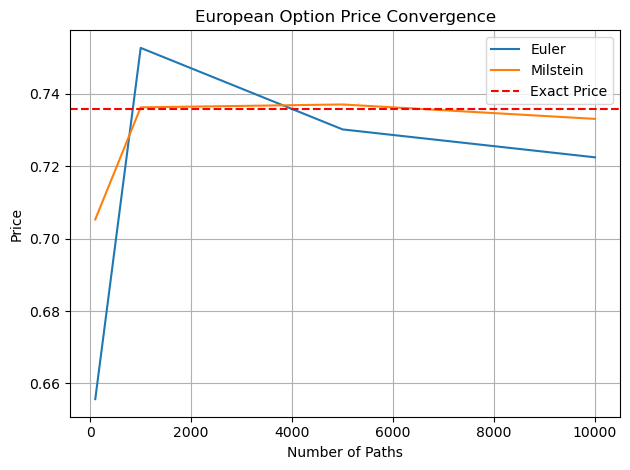

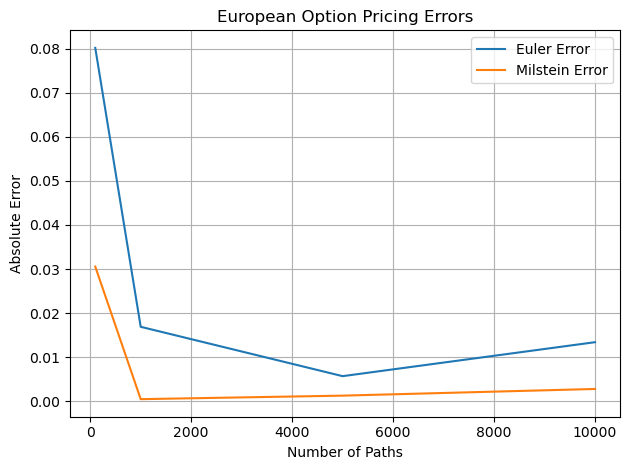

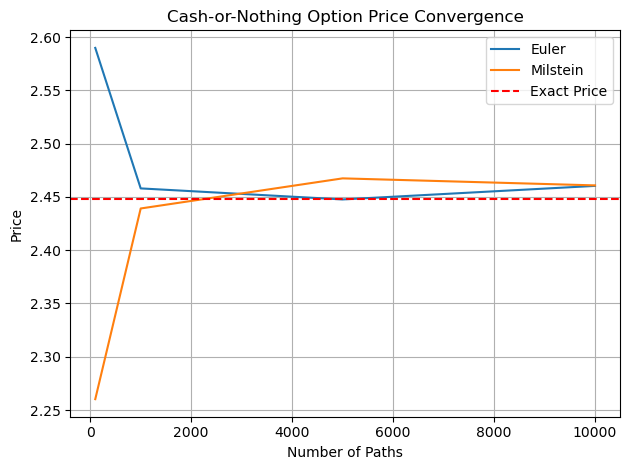

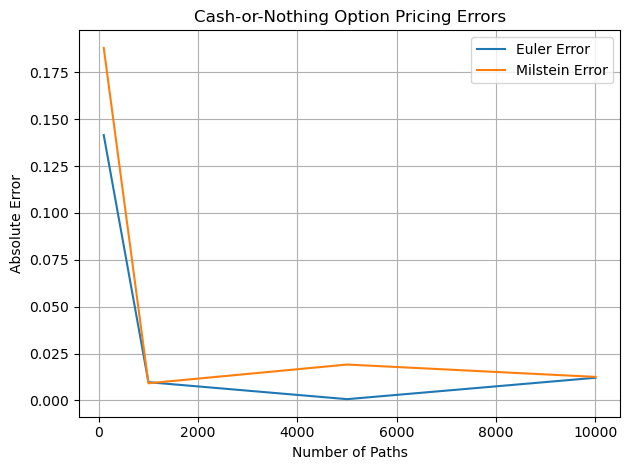

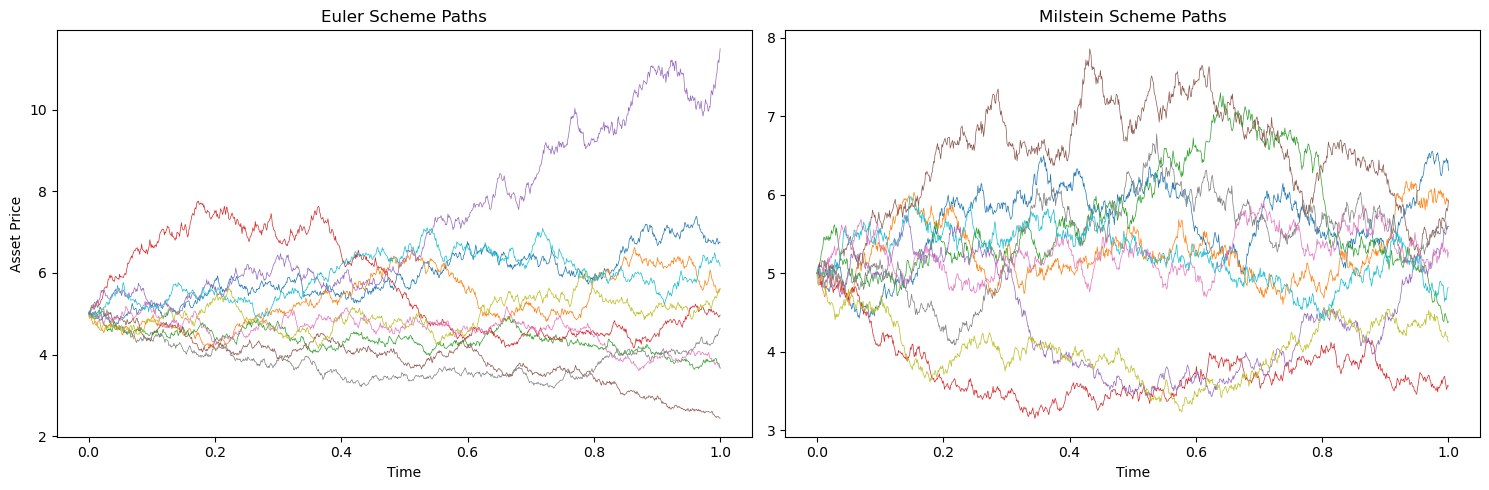

In [31]:
def mainCalculation():
    # Parameter setup
    cp = OptionType.Call
    T = 1
    r = 0.06
    sigma = 0.3
    S_0 = 5
    K = [S_0]
    NoOfSteps = 1000
    NoOfPathsV = [100, 1000, 5000, 10000]
    
    # European option pricing
    print("\nEUROPEAN OPTION PRICING")
    exactPrice = bs_call_put_option_price(cp, S_0, K, sigma, T, r)[0]
    print(f"Exact BS price: {float(exactPrice):.4f}")

    # Monte Carlo simulation
    pricesEuler, pricesMilstein = [], []
    for N in NoOfPathsV:
        # Path generation
        PathsEuler = GeneratePathsGBMEuler(N, NoOfSteps, T, r, sigma, S_0)
        PathsMilstein = GeneratePathsGBMMilstein(N, NoOfSteps, T, r, sigma, S_0)
        
        # Price calculation
        priceEuler = europianPriceFromMCPaths(cp, PathsEuler["S"][:, -1], K, T, r)
        priceMilstein = europianPriceFromMCPaths(cp, PathsMilstein["S"][:, -1], K, T, r)
        
        pricesEuler.append(priceEuler)
        pricesMilstein.append(priceMilstein)
        
        print(f"N={N:5d}: Euler={float(priceEuler):.4f} (Error: {float(priceEuler-exactPrice):.4f})"
              f" | Milstein={float(priceMilstein):.4f} (Error: {float(priceMilstein-exactPrice):.4f})")

    # European option plots
    plot_results(NoOfPathsV, [pricesEuler, pricesMilstein], 
                 ["Euler", "Milstein"], 
                 "European Option Price Convergence", 
                 "Number of Paths", "Price", 1, exactPrice)
    
    # Error analysis
    errorsEuler = np.abs(pricesEuler - exactPrice)
    errorsMilstein = np.abs(pricesMilstein - exactPrice)
    
    plot_results(NoOfPathsV, [errorsEuler, errorsMilstein], 
                 ["Euler Error", "Milstein Error"], 
                 "European Option Pricing Errors", 
                 "Number of Paths", "Absolute Error", 2)

    # Cash-or-Nothing pricing
    print("\nCASH-OR-NOTHING OPTION PRICING")
    exactCash = BS_Cash_Or_Nothing_Price(cp, S_0, K, sigma, T, r)[0]
    print(f"Exact cash-or-nothing price: {float(exactCash):.4f}")

    cashEuler, cashMilstein = [], []
    for N in NoOfPathsV:
        PathsEuler = GeneratePathsGBMEuler(N, NoOfSteps, T, r, sigma, S_0)
        PathsMilstein = GeneratePathsGBMMilstein(N, NoOfSteps, T, r, sigma, S_0)
        
        priceEuler = cashorNothingPriceFromMCPaths(cp, PathsEuler["S"][:, -1], K[0], T, r)
        priceMilstein = cashorNothingPriceFromMCPaths(cp, PathsMilstein["S"][:, -1], K[0], T, r)
        
        cashEuler.append(priceEuler)
        cashMilstein.append(priceMilstein)
        
        print(f"N={N:5d}: Euler={float(priceEuler):.4f} (Error: {float(priceEuler-exactCash):.4f})"
              f" | Milstein={float(priceMilstein):.4f} (Error: {float(priceMilstein-exactCash):.4f})")

    # Cash-or-Nothing plots
    plot_results(NoOfPathsV, [cashEuler, cashMilstein], 
                 ["Euler", "Milstein"], 
                 "Cash-or-Nothing Option Price Convergence", 
                 "Number of Paths", "Price", 3, exactCash)
    
    # Error analysis
    errorsCashEuler = np.abs(cashEuler - exactCash)
    errorsCashMilstein = np.abs(cashMilstein - exactCash)
    
    plot_results(NoOfPathsV, [errorsCashEuler, errorsCashMilstein], 
                 ["Euler Error", "Milstein Error"], 
                 "Cash-or-Nothing Option Pricing Errors", 
                 "Number of Paths", "Absolute Error", 4)

    # Show path plots
    plot_paths(NoOfSteps, T, r, sigma, S_0)

# Run main calculation
if __name__ == "__main__":
    mainCalculation()

### `mainCalculation()` Workflow:
1. **Exact Price Calculation**: Uses `bs_call_put_option_price`.
2. **Monte Carlo Simulation**:
   - Generates paths using Euler and Milstein.
   - Computes option prices for varying path counts (100 to 10,000).
3. **Convergence Analysis**:
   - Plots price convergence and absolute errors vs. exact solution.
   - Compares Euler and Milstein scheme accuracies.

### Key Observations:
- **Milstein Scheme**: Lower bias due to additional correction term.
- **Monte Carlo Error**: Decreases as \(1/\sqrt{N}\) with more paths.
- **Cash-or-Nothing**: Requires accurate estimation of \(\mathbb{P}(S_T > K)\), sensitive to volatility and drift.



EUROPEAN OPTION PRICING
Exact BS price: 0.7359
N=  100: Euler=0.7714 (Error: 0.0355) | Milstein=0.6835 (Error: -0.0524)
N= 1000: Euler=0.7142 (Error: -0.0216) | Milstein=0.7525 (Error: 0.0167)
N= 5000: Euler=0.7372 (Error: 0.0014) | Milstein=0.7428 (Error: 0.0070)
N=10000: Euler=0.7323 (Error: -0.0035) | Milstein=0.7230 (Error: -0.0128)

CASH-OR-NOTHING OPTION PRICING
Exact cash-or-nothing price: 2.4483
N=  100: Euler=2.4486 (Error: 0.0003) | Milstein=2.2131 (Error: -0.2352)
N= 1000: Euler=2.4627 (Error: 0.0144) | Milstein=2.4015 (Error: -0.0468)
N= 5000: Euler=2.4439 (Error: -0.0044) | Milstein=2.4298 (Error: -0.0185)
N=10000: Euler=2.4627 (Error: 0.0144) | Milstein=2.4589 (Error: 0.0106)


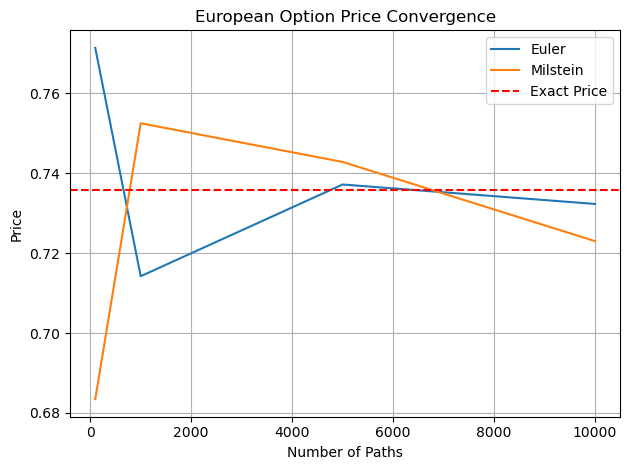

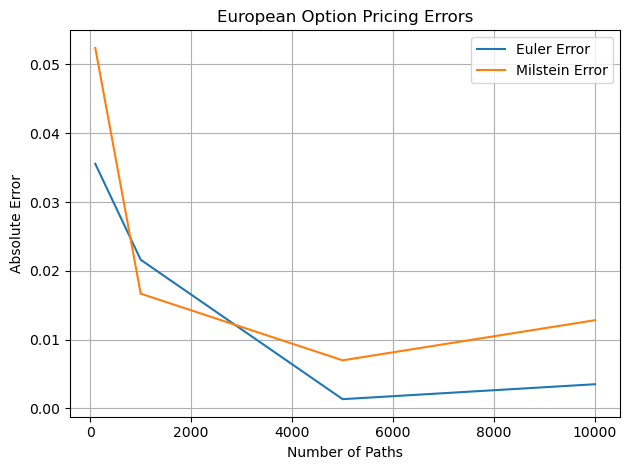

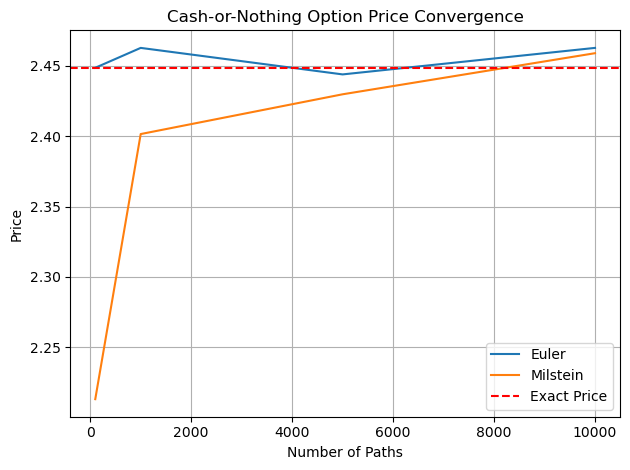

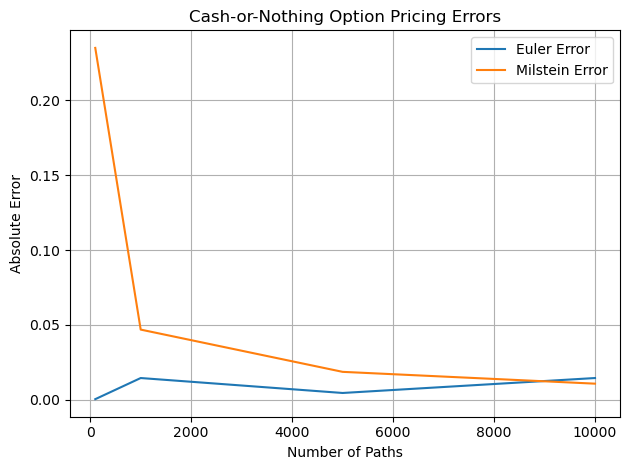

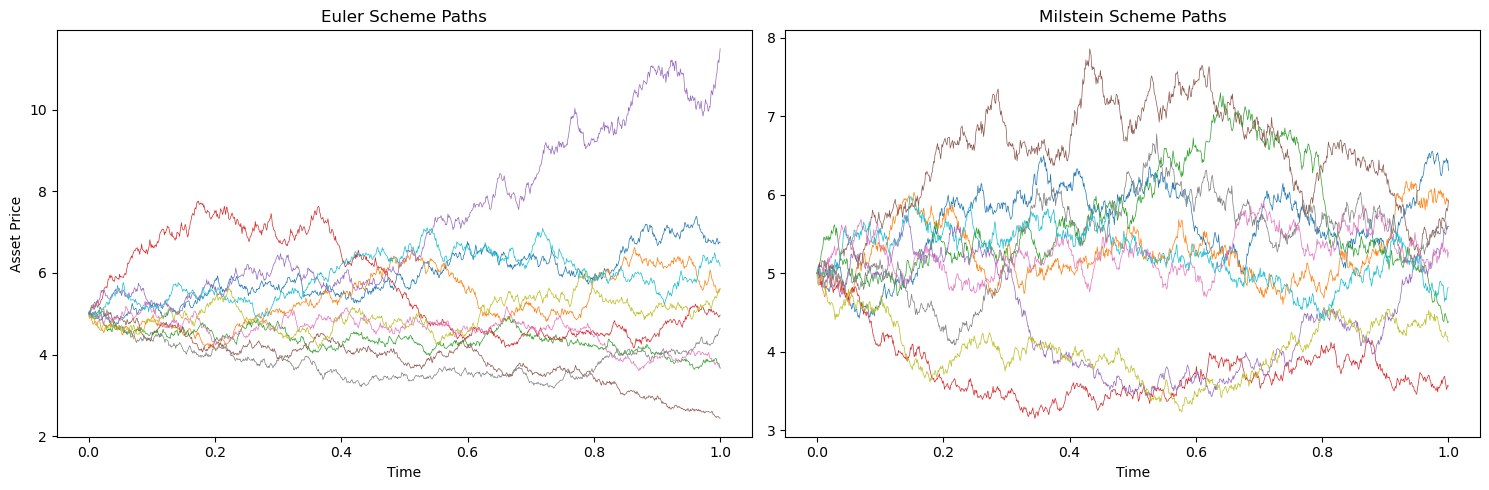

In [32]:

mainCalculation()